In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, func
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session


In [2]:
# Define the path to the SQLite database
db_path = "hawaii.sqlite"

# Create engine to connect to the SQLite database
engine = create_engine(f"sqlite:///{db_path}")

# Reflect the existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# Save references to the classes named station and measurement
Station = Base.classes.station
Measurement = Base.classes.measurement

# Link Python to the database by creating a SQLAlchemy session
session = Session(engine)


/var/folders/4t/kc469r217bn7xqn8b7pdps400000gn/T/ipykernel_1381/332831911.py:9: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


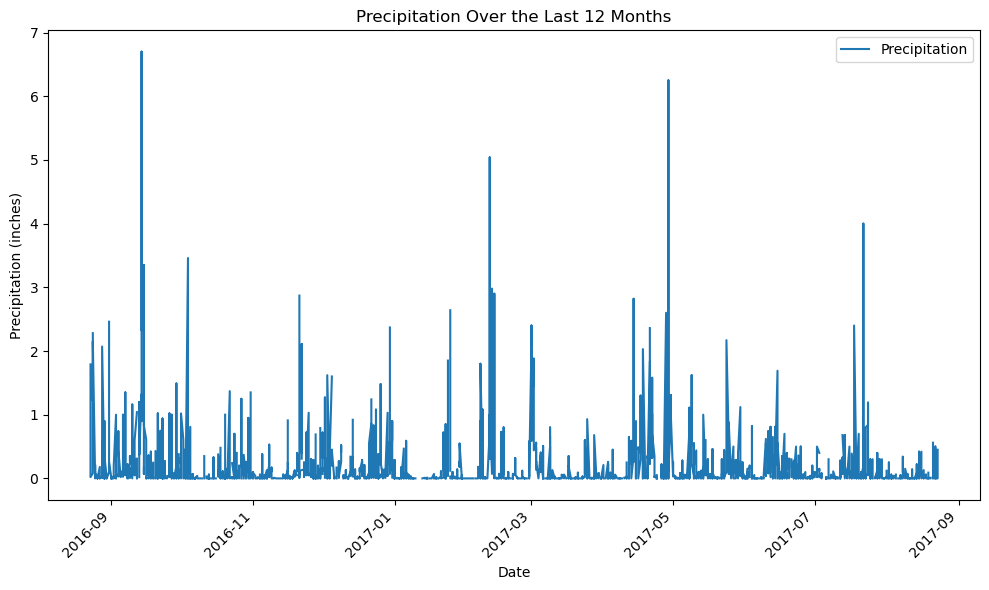

In [3]:
# Precipitation Analysis

# Get the last date in the dataset
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]

# Calculate the date one year ago from the last date in the dataset
one_year_ago = pd.to_datetime(last_date) - pd.DateOffset(years=1)
one_year_ago_str = one_year_ago.strftime('%Y-%m-%d')

# Query the dates and precipitation measurements from the last year of data
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago_str).all()

# Load the query results into a Pandas DataFrame
precipitation_df = pd.DataFrame(precipitation_data, columns=['date', 'prcp'])
precipitation_df['date'] = pd.to_datetime(precipitation_df['date'])
precipitation_df.set_index('date', inplace=True)

# Plot the results
precipitation_df.plot(figsize=(10, 6), rot=45)
plt.title('Precipitation Over the Last 12 Months')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.legend(['Precipitation'])
plt.tight_layout()
plt.show()

In [4]:
# Station Analysis

# Calculate the total number of stations
total_stations = session.query(func.count(Station.station)).all()[0][0]
print(f"Total number of stations: {total_stations}")

# Find the most active stations
active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active_station = active_stations[0][0]

print("Most active stations (station ID and count):")
for station, count in active_stations:
    print(f"Station: {station}, Count: {count}")

# Identify the station ID, name, and count
station_info = session.query(Station).filter(Station.station == most_active_station).first()
print(f"\nMost active station ID: {most_active_station}")
print(f"Station name: {station_info.name}")

Total number of stations: 9
Most active stations (station ID and count):
Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511

Most active station ID: USC00519281
Station name: WAIHEE 837.5, HI US


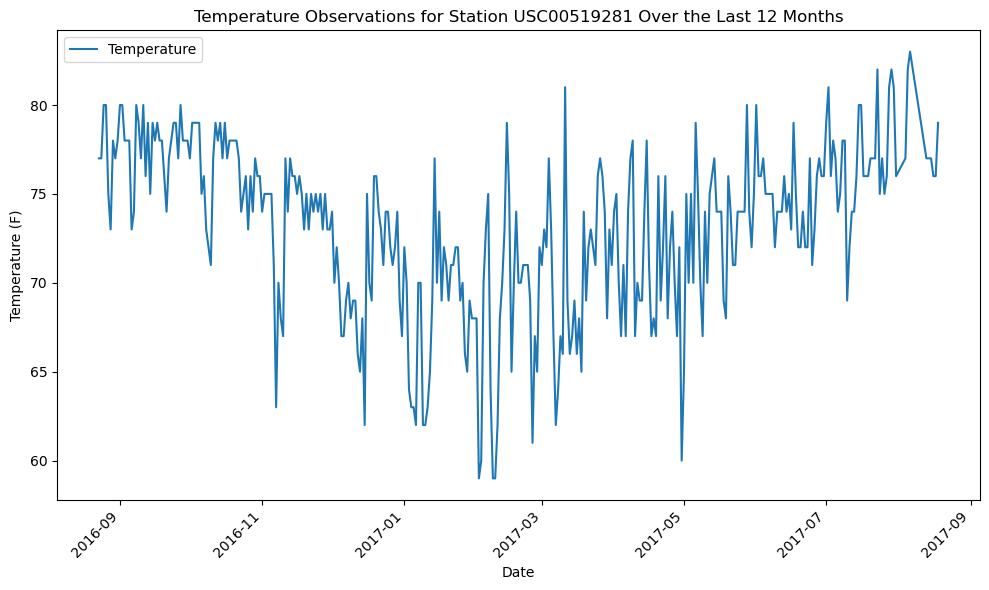

In [5]:
# Query the last 12 months of temperature data for the most active station
temperature_data = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == most_active_station).filter(Measurement.date >= one_year_ago_str).all()

# Load the query results into a Pandas DataFrame
temperature_df = pd.DataFrame(temperature_data, columns=['date', 'tobs'])
temperature_df['date'] = pd.to_datetime(temperature_df['date'])
temperature_df.set_index('date', inplace=True)

# Plot the results
temperature_df.plot(figsize=(10, 6), rot=45)
plt.title(f'Temperature Observations for Station {most_active_station} Over the Last 12 Months')
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.legend(['Temperature'])
plt.tight_layout()
plt.show()


In [6]:
# Precipitation Analysis

# Get the most recent date in the dataset
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]

# Calculate the date one year ago from the most recent date
one_year_ago = pd.to_datetime(most_recent_date) - pd.DateOffset(years=1)
one_year_ago_str = one_year_ago.strftime('%Y-%m-%d')

# Query the dates and precipitation measurements from the last 12 months of data
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago_str).all()

# Load the query results into a Pandas DataFrame
precipitation_df = pd.DataFrame(precipitation_data, columns=['date', 'prcp'])
precipitation_df['date'] = pd.to_datetime(precipitation_df['date'])
precipitation_df.set_index('date', inplace=True)

# Display the most recent date and the first few rows of the DataFrame
print(f"Most recent date in the dataset: {most_recent_date}")
print(precipitation_df.head())

Most recent date in the dataset: 2017-08-23
            prcp
date            
2016-08-23  0.00
2016-08-24  0.08
2016-08-25  0.08
2016-08-26  0.00
2016-08-27  0.00


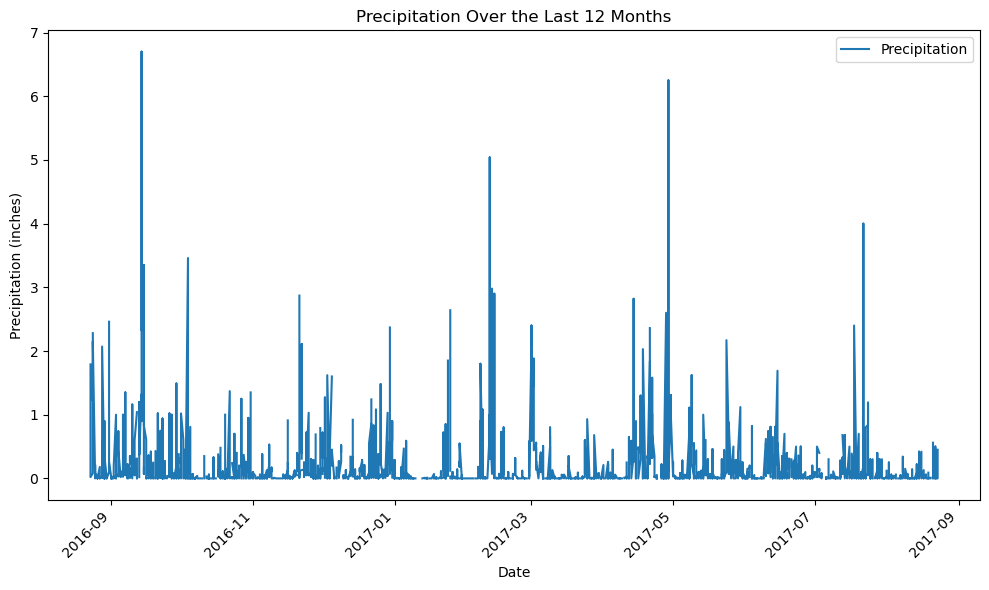

In [7]:
# Calculate the date one year ago from the most recent date
one_year_ago = pd.to_datetime(most_recent_date) - pd.DateOffset(years=1)
one_year_ago_str = one_year_ago.strftime('%Y-%m-%d')

# Query the dates and precipitation measurements from the last 12 months of data
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago_str).all()

# Load the query results into a Pandas DataFrame and explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_data, columns=['date', 'prcp'])

# Convert the 'date' column to datetime
precipitation_df['date'] = pd.to_datetime(precipitation_df['date'])

# Sort the DataFrame values by 'date'
precipitation_df.sort_values(by='date', inplace=True)

# Plot the results
precipitation_df.plot(x='date', y='prcp', figsize=(10, 6), rot=45)
plt.title('Precipitation Over the Last 12 Months')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.legend(['Precipitation'])
plt.tight_layout()
plt.show()


In [8]:
from sqlalchemy import create_engine, func
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session

# Define the path to the SQLite database
db_path = "hawaii.sqlite"

# Create engine to connect to the SQLite database
engine = create_engine(f"sqlite:///{db_path}")

# Reflect the existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# Save references to the classes named station and measurement
Station = Base.classes.station
Measurement = Base.classes.measurement

# Link Python to the database by creating a SQLAlchemy session
session = Session(engine)

# Calculate the total number of stations
total_stations = session.query(func.count(Station.station)).scalar()
print(f"Total number of stations: {total_stations}")


Total number of stations: 9


/var/folders/4t/kc469r217bn7xqn8b7pdps400000gn/T/ipykernel_1381/411469947.py:13: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [9]:
# Query to list the stations and observation counts in descending order
active_stations = session.query(Measurement.station, func.count(Measurement.station).label('count')).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

# Print the most active stations
print("Most active stations (station ID and count):")
for station, count in active_stations:
    print(f"Station: {station}, Count: {count}")


Most active stations (station ID and count):
Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


In [10]:
from sqlalchemy import create_engine, func
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session

# Define the path to the SQLite database
db_path = "hawaii.sqlite"

# Create engine to connect to the SQLite database
engine = create_engine(f"sqlite:///{db_path}")

# Reflect the existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# Save references to the classes named station and measurement
Station = Base.classes.station
Measurement = Base.classes.measurement

# Link Python to the database by creating a SQLAlchemy session
session = Session(engine)

# Query to list the stations and observation counts in descending order
active_stations = session.query(Measurement.station, func.count(Measurement.station).label('count')).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

# Print the most active stations
print("Most active stations (station ID and count):")
for station, count in active_stations:
    print(f"Station: {station}, Count: {count}")

# Identify the station ID with the greatest number of observations
most_active_station_id = active_stations[0][0]
most_active_station_count = active_stations[0][1]

print(f"\nStation ID with the greatest number of observations: {most_active_station_id}")
print(f"Number of observations: {most_active_station_count}")


Most active stations (station ID and count):
Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511

Station ID with the greatest number of observations: USC00519281
Number of observations: 2772


/var/folders/4t/kc469r217bn7xqn8b7pdps400000gn/T/ipykernel_1381/1232256341.py:13: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [11]:
from sqlalchemy import create_engine, func
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session

# Define the path to the SQLite database
db_path = "hawaii.sqlite"

# Create engine to connect to the SQLite database
engine = create_engine(f"sqlite:///{db_path}")

# Reflect the existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# Save references to the classes named station and measurement
Station = Base.classes.station
Measurement = Base.classes.measurement

# Link Python to the database by creating a SQLAlchemy session
session = Session(engine)

# Query to find the most active station
most_active_station_id = session.query(Measurement.station, func.count(Measurement.station).label('count')).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()[0]

# Query to calculate the lowest, highest, and average temperatures for the most-active station
temperature_stats = session.query(
    func.min(Measurement.tobs),
    func.avg(Measurement.tobs),
    func.max(Measurement.tobs)
).filter(Measurement.station == most_active_station_id).all()

lowest_temp, avg_temp, highest_temp = temperature_stats[0]

print(f"Most active station ID: {most_active_station_id}")
print(f"Lowest temperature: {lowest_temp}")
print(f"Average temperature: {avg_temp}")
print(f"Highest temperature: {highest_temp}")


Most active station ID: USC00519281
Lowest temperature: 54.0
Average temperature: 71.66378066378067
Highest temperature: 85.0


/var/folders/4t/kc469r217bn7xqn8b7pdps400000gn/T/ipykernel_1381/1889110267.py:13: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [12]:
session.close()

In [13]:
## Part 2: Design Your Climate App

In [14]:
from flask import Flask, jsonify
from sqlalchemy import create_engine, func
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
import pandas as pd
import datetime as dt
from collections.abc import Sequence  # Ensure this is imported correctly

# Define the path to the SQLite database
db_path = "hawaii.sqlite"

# Create engine to connect to the SQLite database
engine = create_engine(f"sqlite:///{db_path}")

# Reflect the existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)  # Corrected to use only autoload_with

# Save references to the classes named station and measurement
Station = Base.classes.station
Measurement = Base.classes.measurement

# Flask setup
app = Flask(__name__)

# Flask Routes
@app.route("/")
def welcome():
    return (
        f"Welcome to the Climate App API!<br/>"
        f"Available Routes:<br/>"
        f"/api/v1.0/precipitation<br/>"
        f"/api/v1.0/stations<br/>"
        f"/api/v1.0/tobs<br/>"
        f"/api/v1.0/<start><br/>"
        f"/api/v1.0/<start>/<end><br/>"
    )

@app.route("/api/v1.0/precipitation")
def precipitation():
    # Link Python to the database by creating a SQLAlchemy session
    session = Session(engine)

    # Get the most recent date in the dataset
    most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]

    # Calculate the date one year ago from the most recent date
    one_year_ago = pd.to_datetime(most_recent_date) - pd.DateOffset(years=1)
    one_year_ago_str = one_year_ago.strftime('%Y-%m-%d')

    # Query the dates and precipitation measurements from the last 12 months of data
    precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago_str).all()

    # Close the session
    session.close()

    # Convert the query results to a dictionary
    precipitation_dict = {date: prcp for date, prcp in precipitation_data}

    # Return the JSON representation of the dictionary
    return jsonify(precipitation_dict)

@app.route("/api/v1.0/stations")
def stations():
    # Link Python to the database by creating a SQLAlchemy session
    session = Session(engine)

    # Query all the stations
    stations_data = session.query(Station.station).all()

    # Close the session
    session.close()

    # Convert the query results to a list
    stations_list = [station[0] for station in stations_data]

    # Return the JSON representation of the list
    return jsonify(stations_list)

@app.route("/api/v1.0/tobs")
def tobs():
    # Link Python to the database by creating a SQLAlchemy session
    session = Session(engine)

    # Get the most recent date in the dataset
    most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]

    # Calculate the date one year ago from the most recent date
    one_year_ago = pd.to_datetime(most_recent_date) - pd.DateOffset(years=1)
    one_year_ago_str = one_year_ago.strftime('%Y-%m-%d')

    # Query the most active station
    most_active_station_id = session.query(Measurement.station, func.count(Measurement.station).label('count')).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()[0]

    # Query the temperature observations for the most active station for the last 12 months
    tobs_data = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == most_active_station_id).filter(Measurement.date >= one_year_ago_str).all()

    # Close the session
    session.close()

    # Convert the query results to a list of dictionaries
    tobs_list = [{date: tobs} for date, tobs in tobs_data]

    # Return the JSON representation of the list
    return jsonify(tobs_list)

@app.route("/api/v1.0/<start>")
@app.route("/api/v1.0/<start>/<end>")
def temperature_stats(start, end=None):
    # Link Python to the database by creating a SQLAlchemy session
    session = Session(engine)

    # If there is no end date, calculate TMIN, TAVG, and TMAX for all dates greater than or equal to the start date
    if end is None:
        temperature_data = session.query(
            func.min(Measurement.tobs),
            func.avg(Measurement.tobs),
            func.max(Measurement.tobs)
        ).filter(Measurement.date >= start).all()
    else:
        # If there is an end date, calculate TMIN, TAVG, and TMAX for dates between the start and end date, inclusive
        temperature_data = session.query(
            func.min(Measurement.tobs),
            func.avg(Measurement.tobs),
            func.max(Measurement.tobs)
        ).filter(Measurement.date >= start).filter(Measurement.date <= end).all()

    # Close the session
    session.close()

    # Extract the data from the query results
    tmin, tavg, tmax = temperature_data[0]

    # Create a dictionary to hold the results
    temperature_dict = {
        "TMIN": tmin,
        "TAVG": tavg,
        "TMAX": tmax
    }

    # Return the JSON representation of the dictionary
    return jsonify(temperature_dict)

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (fsevents)
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 15, in <module>
    from ipykernel import kernelapp as app
  File "/Applications/anaconda3/lib/python3.11/site-packages/ipykernel/__init__.py", line 7, in <module>
    from .connect import *
  File "/Applications/anaconda3/lib/python3.11/site-packages/ipykernel/connect.py", line 12, in <module>
    import jupyter_client
  File "/Applications/anaconda3/lib/python3.11/site-packages/jupyter_client/__init__.py", line 3, in <module>
    from .asynchronous import AsyncKernelClient
  File "/Applications/anaconda3/lib/python3.11/site-packages/jupyter_client/asynchronous/__init__.py", line 1, in <module>
    from .client import AsyncKernelClient  # noqa
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/jupyter_client/asynchro

SystemExit: 1

/Applications/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
